In [1]:
import pandas as pd

df = pd.read_csv("./data/data_customer.csv")
print(df.head())


   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  


In [2]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_category = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['preferred_category'] = le_category.fit_transform(df['preferred_category'])


In [4]:
features = ['age', 'gender', 'income', 'spending_score', 
            'membership_years', 'purchase_frequency', 
            'preferred_category', 'last_purchase_amount']

X = df[features]


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "4"



Mở Start Menu, tìm Environment Variables hoặc:

Chuột phải vào This PC > Properties > Advanced system settings > Environment Variables.

Tạo biến mới ở phần User variables:

Variable name: OMP_NUM_THREbADS

Variable value: 4 nhớ làm bước này ko k chạy đc đâu


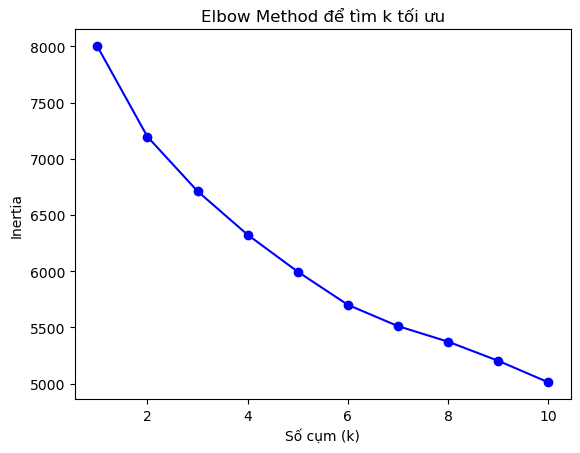

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để tìm k tối ưu')
plt.show()


cái này là biểu đồ elbow method để tìm cụm k tối ưu trong mô hình . chọn k=4 vì cái góc gãy từ 4-10 nó k bị quá dốc còn 1-4 dốc nên k chọn . Mục tiêu: tìm điểm "khuỷu tay" (elbow) – là nơi đường cong bắt đầu giảm chậm dần → sau đó thêm cụm nữa không giúp cải thiện nhiều.

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [9]:
print(df.groupby('cluster').mean())


                 id        age    gender         income  spending_score  \
cluster                                                                   
0        480.864341  39.267442  0.228682   67717.155039       50.755814   
1        509.272031  49.038314  1.628352   60334.417625       47.693487   
2        509.488000  45.328000  1.236000  116729.668000       50.836000   
3        502.792208  41.216450  0.943723  112987.333333       53.822511   

         membership_years  purchase_frequency  preferred_category  \
cluster                                                             
0                4.821705           22.236434            2.151163   
1                6.183908           26.030651            2.084291   
2                2.876000           25.384000            2.180000   
3                8.190476           33.415584            1.848485   

         last_purchase_amount  
cluster                        
0                  413.029961  
1                  637.872912  
2     

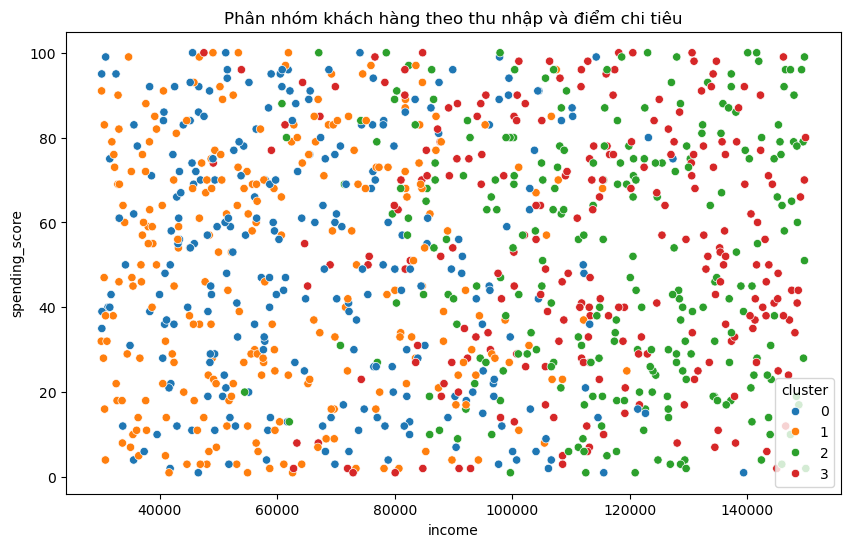

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='spending_score', hue='cluster', palette='tab10')
plt.title('Phân nhóm khách hàng theo thu nhập và điểm chi tiêu')
plt.show()


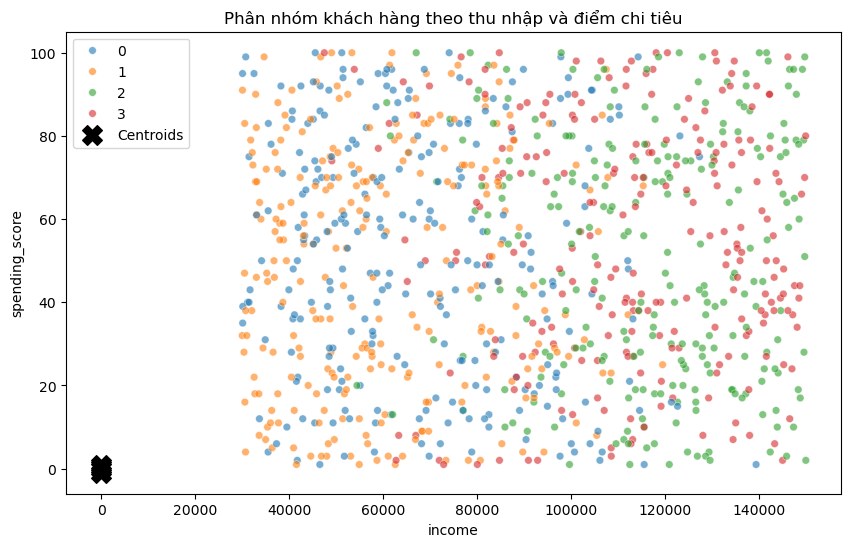

In [11]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='spending_score', hue='cluster', palette='tab10', s=30, alpha=0.6)

# Vẽ tâm cụm
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title('Phân nhóm khách hàng theo thu nhập và điểm chi tiêu')
plt.legend()
plt.show()


<Axes: xlabel='income', ylabel='spending_score'>

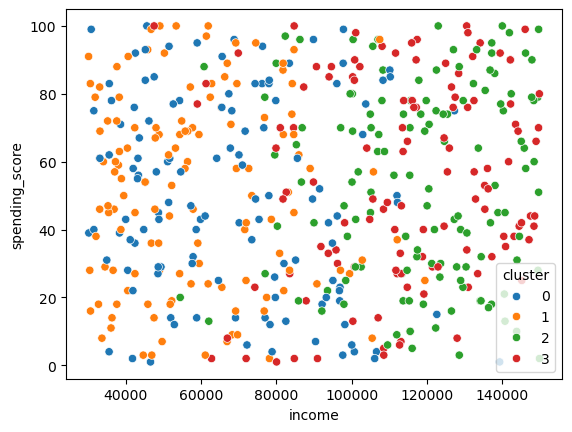

In [12]:
df_sample = df.sample(500)  # hoặc 300 tuỳ số lượng
sns.scatterplot(data=df_sample, x='income', y='spending_score', hue='cluster', palette='tab10')


In [13]:
df.groupby('cluster').mean()[['income', 'spending_score', 'last_purchase_amount']]


,income,spending_score,last_purchase_amount
cluster,,,
0,67717.155039,50.755814,413.029961
1,60334.417625,47.693487,637.872912
2,116729.668000,50.836000,444.639840
3,112987.333333,53.822511,468.147835
